# 1. 통계문제
### 문제 1)
* 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다. 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다. 그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요

In [64]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import scipy.stats as stats

In [2]:
# 표본평균 , 표본 표준편차, 표본 크기, 모집단 평균 번수설정

sample_mean = 495
sample_std = 10
n = 25
mu_0 = 500

In [5]:
# t-통계량 계산 (표본 평균 - 모집단 평균) / 표본 평균의 표준오차
t_stat = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

In [13]:
#자유도 설정
df = n - 1

# p-value 계산 (양측검정)
p_value = 2 * stats.t.sf(np.abs(t_stat), df)

In [14]:
# 유의수준 0.05에서의 판단
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")

t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


### 문제2) 분포 시각화

* 문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.
* **기각역** :  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

Hint)

- `plt.axvline` : y축 평행선 그리기
- `plt.fill_between` : 그래프 면적 색칠하기
- 예시결과

In [16]:
# t-분포의 확률밀도 함수 (PDF) 값 계산
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

#임계값 계산 ( 양측검정에서 유의수준 0.05 설정 )
critical_value = stats.t.ppf(1 - alpha / 2, df) # 양측검정의 임계값

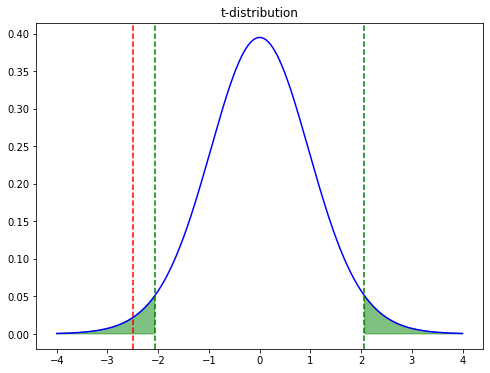

In [22]:
# 그래프 시각화
plt.figure(figsize = (8, 6))
plt.plot(x, y, color = 'blue') #t-분포그리기

# 기각역을 초록색으로 색칠 (기각역은 양쪽 꼬리 부분)
plt.fill_between(x, y, where=(x <= -critical_value) | (x >= critical_value), color='green', alpha=0.5)

# t-통계량 빨간 점선으로 표시
plt.axvline(x=t_stat, color='red', linestyle='--')

# 임계값 표시 (초록색 점선)
plt.axvline(x=critical_value, color='green', linestyle='--')
plt.axvline(x=-critical_value, color='green', linestyle='--')

# 그래프 타이틀 추가
plt.title("t-distribution")

# 그래프 보여주기
plt.show()


### 문제 3) 단일 t 표본 검정

- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다.프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.

In [23]:
# 데이터
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]

#유의수준
alpha = 0.05

#모집단 평균
mu_0 = 75

In [24]:
# t-검정
t_stat, p_value = stats.ttest_1samp(sample_scores, mu_0)

#단측검정(우측) : 성적이 향상되었는지 보기 떄문에 양의방향 우측으로 검정한다.
if t_stat > 0:
    p_value /= 2
else:
    p_value = 1 - (p_value / 2) 
    
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다")

t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


### 문제 4) 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.

In [26]:
# 그룹 A와 B의 체중 감소량 데이터
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

# 유의수준 설정
alpha = 0.05

In [29]:
# 등분산성 검정
levene_stat, levene_p = stats.levene(group_A, group_B)
equal_var = levene_p >= alpha  # 등분산이면 True
# levene_p는 등분산 검정의 p-value로 이 값이 유의수준(0.05)보다 크면 귀무가설을 채택 (equal_var가 True가 된다.)

# 독립 표본 t 검정
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=equal_var)

In [32]:
# 결과출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")

t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


### 문제 5) 대응표본 t검정
- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.
- 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.

In [34]:
# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

# 유의수준 설정 = 0.05
alpha = 0.05

In [35]:
# 체중감소, 평균 감소량, 표준편차 계산
diff = before - after 
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)

In [36]:
# 대응표본 t-검정 수행
t_stat, p_value = stats.ttest_rel(before, after, alternative='greater') #alternative='greater'는 before > after 방향성 가설 검정

In [37]:
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 고혈압약은 효과가 없습니다.")

t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.


### 문제 6) 표본 추출

- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.
- 데이터 불러오는 코드 & 예상결과

In [43]:
pip install kagglehub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 KB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [44]:
# 데이터 불러오기

import kagglehub
import os
import pandas as pd


# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)

100%|██████████| 14.5M/14.5M [00:00<00:00, 82.3MB/s]

Extracting files...


Path to dataset files: /aiffel/.cache/kagglehub/datasets/mashlyn/online-retail-ii-uci/versions/3


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [49]:
# 평균가격 TotalPrice 만들기
retail['TotalPrice'] = retail['Quantity'] * retail['Price']

In [50]:
# 영국데이터만 필터링해서 data 저장
uk_data = retail[retail['Country'] == 'United Kingdom']

In [55]:
# TotalPrice가 양수인 데이터만 사용한다 (취소된 주문건에 대해서 사용하지 않기위해)
uk_data = uk_data[uk_data['TotalPrice'] > 0]

In [69]:
# 표본 크기 리스트
sample_sizes = [30, 100, 300]

# 각각의 표본에 대해 평균 구매 금액 계산
for size in sample_sizes:
    sample = uk_data.sample(n=size, random_state=42)
    mean_total_price = sample['TotalPrice'].mean()
    print(f"Sample size: {size}, Mean TotalPrice: {mean_total_price:.2f}")

Sample size: 30, Mean TotalPrice: 16.98
Sample size: 100, Mean TotalPrice: 17.66
Sample size: 300, Mean TotalPrice: 14.39


In [61]:
population_mean = uk_data['TotalPrice'].mean()
print(f"Population mean TotalPrice: {population_mean:.2f}")

Population mean TotalPrice: 18.65


### 문제 7) 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

In [68]:
# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = uk_data['TotalPrice'].sample(size,random_state=42) 
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: ({interval[0]:.2f}, {interval[1]:.2f})")

Sample size: 30, Mean: 16.98, 95% CI: (8.89, 25.06)
Sample size: 100, Mean: 17.66, 95% CI: (12.02, 23.30)
Sample size: 300, Mean: 14.39, 95% CI: (10.71, 18.07)


### 문제 8 가설검정 t-test

- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

In [72]:
# 영국의 토탈금액
uk_data = retail[(retail['Country'] == 'United Kingdom') & (retail['TotalPrice'] > 0)] 

#독일의 토탈금액
germany_data = retail[(retail['Country'] == 'Germany') & (retail['TotalPrice'] > 0)]

# 영국과 독일 고객의 평균 구매 금액 추출
uk_mean = uk_data['TotalPrice'].mean()
germany_mean = germany_data['TotalPrice'].mean()

In [73]:
# 두 표본의 t-검정 (등분산성 가정 : equal_var=True)
t_stat, p_value = stats.ttest_ind(uk_data['TotalPrice'], germany_data['TotalPrice'], equal_var=True)

# 결과 해석
print(f"영국 평균 구매 금액: {uk_mean:.2f}")
print(f"독일 평균 구매 금액: {germany_mean:.2f}")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

영국 평균 구매 금액: 18.65
독일 평균 구매 금액: 25.83
t-statistic: -4.4254, p-value: 0.0000


In [75]:
# 가설 검정 결과 해석
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


문제 9~ 10) A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다. 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다. 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

- 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
- 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지

## **문제9)**

- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요

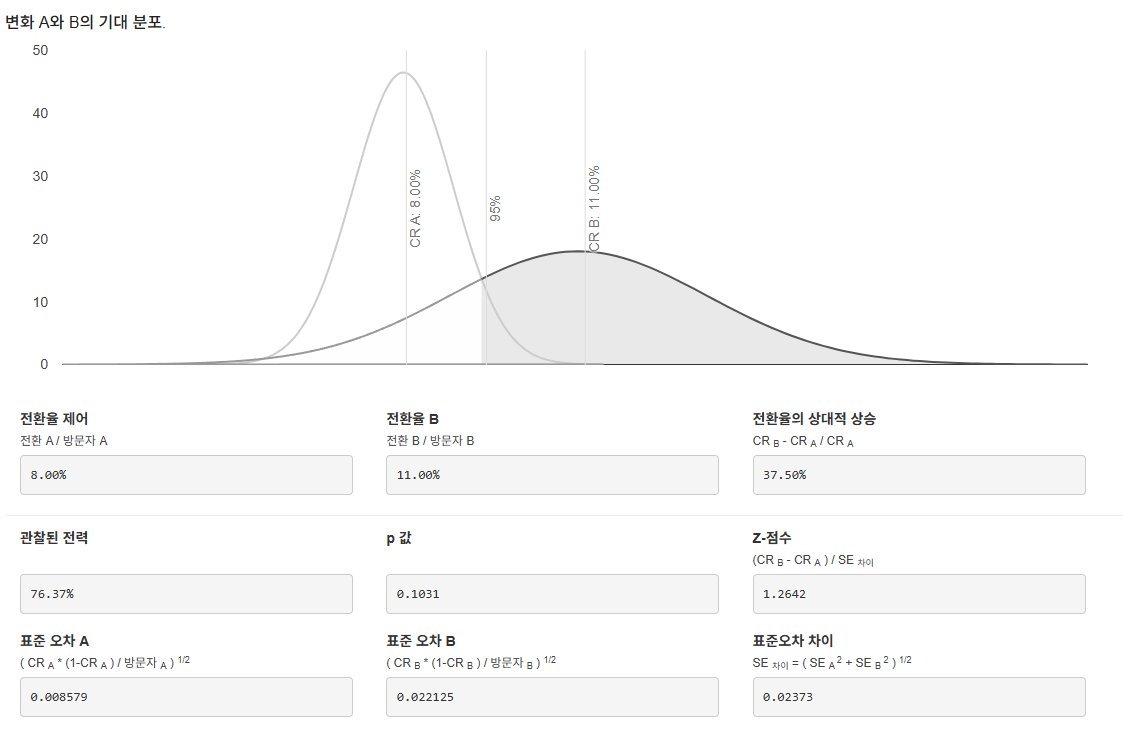

### 답

1. A페이지의 전환율은 8프로이고 B페이지의 전환률은 11% 으로 B가 높아보이지만 현재 B의 노출수에 차이가 있고, P값이 0.1031로 유의수준 0.05보다 크기 때문에 유미의한 값이라고 볼 수 없습니다.

2. B가 A 페이지 보다 전환율이 높다고 확신할 수 없고 추가적으로 데이터 수집을 더 해보는것이 좋다고 생각하며 현재로써는 위 결과 값만으로는 의미는 차이가 없다고 생각이 됩니다.

## **문제 10)**

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요(추천 문헌 [요즘IT](https://yozm.wishket.com/)

### 답



* A/B 테스트 결과가 통계적으로 유의하더라도 그 차이가 실질적으로 의미가 있어야 한다고 생각하기 떄문에 비용 대비 효과나 리소스 등을 판단하여 의사결정을 할 수 있다고 생각합니다.
* 사례를 들어 설명하자면 A버전의 사이트 화면과 B버전의 사이트 화면을 두고 전환율은 0.2% , P-value는 0.03으로 유의하다고 가정했을 때 전화율의 증가가 통계적으로 유의하더라도 0.2%의 상승이 실제 매출이나 사용자 행동에 큰 영향을 미치지 않는다면 사이트를 변경하는데 드는 디자인 및 개발 비용 , 사용자 혼란등을 고려하여 변경을 보류할 수도 있다고 생각합니다.